# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [8]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/last/GBP-BRL,USD-BRL,EUR-BRL')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'GBPBRL': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.06316', 'low': '7.04722', 'varBid': '0.000699', 'pctChange': '0.009902', 'bid': '7.06069', 'ask': '7.06462', 'timestamp': '1764031806', 'create_date': '2025-11-24 21:50:06'}, 'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.3903', 'low': '5.38045', 'varBid': '0.0005', 'pctChange': '0.009281', 'bid': '5.3878', 'ask': '5.3908', 'timestamp': '1764031806', 'create_date': '2025-11-24 21:50:06'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '6.20347', 'low': '6.19963', 'varBid': '0.003844', 'pctChange': '0.062007', 'bid': '6.20347', 'ask': '6.21891', 'timestamp': '1764031799', 'create_date': '2025-11-24 21:49:59'}}


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [10]:
print('{}: {}'.format(cotacoes_dic['GBPBRL']['code'],cotacoes_dic['GBPBRL']['bid']))
print('{}: {}'.format(cotacoes_dic['EURBRL']['code'],cotacoes_dic['EURBRL']['bid']))
print('{}: {}'.format(cotacoes_dic['USDBRL']['code'],cotacoes_dic['USDBRL']['bid']))

GBP: 7.06069
EUR: 6.20347
USD: 5.3878


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [27]:
cotacoes_libra_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/GBP-BRL/30')
cotacoes_libra_dic = cotacoes_libra_30d.json()
print(cotacoes_libra_dic[0])

cotacoes_diarias = [float(item['bid']) for item in cotacoes_libra_dic]
print(cotacoes_diarias)


{'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.06316', 'low': '7.04722', 'varBid': '-0.002827', 'pctChange': '-0.040042', 'bid': '7.05716', 'ask': '7.07714', 'timestamp': '1764032187', 'create_date': '2025-11-24 21:56:27'}
[7.05716, 7.05999, 7.06714, 7.07214, 6.97651, 6.9607, 6.99649, 7.00872, 6.95894, 6.96379, 6.96568, 6.94624, 6.93217, 6.96379, 7.01665, 7.01665, 7.01754, 6.98812, 7.02627, 7.03867, 7.07029, 7.0691, 7.07714, 7.05716, 7.10227, 7.16801, 7.17054, 7.16969, 7.17483, 7.20461]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [33]:
cotacoes_libra_nov = requests.get('https://economia.awesomeapi.com.br/GBP-BRL/25?start_date=20251101&end_date=20251124')
cotacoes_libra_dic = cotacoes_libra_nov.json()

cotacoes_diarias = [float(item['bid']) for item in cotacoes_libra_dic]
print(cotacoes_diarias)

[7.05999, 7.05716, 7.0597, 7.0604, 7.05716, 7.06087, 7.06044, 7.05889, 7.06206, 7.06026, 7.05219, 7.05219, 7.05219, 7.05219, 7.05716, 7.05976, 7.06012, 7.06113, 7.05219, 7.05219, 7.05716, 7.0606, 7.06168, 7.05219, 7.05716]


#### Gráfico com as cotações do BitCoin

<function matplotlib.pyplot.show(close=None, block=None)>

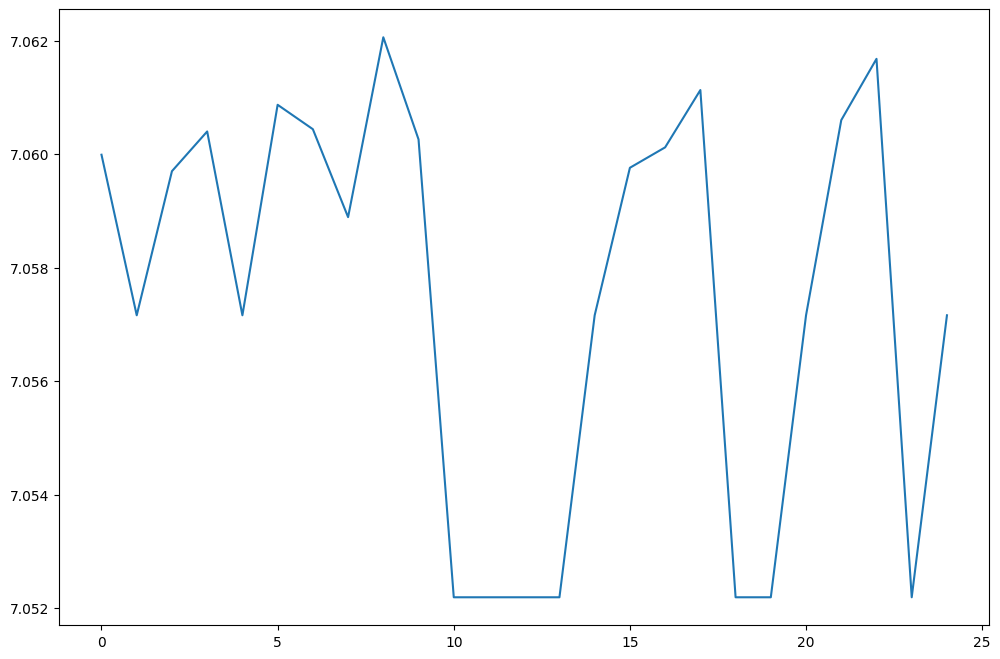

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(cotacoes_diarias)
plt.show